# Exercise session nº 5
---
# Furrow Constriction in Animal Cell Cytokinesis

__*Sacha Ichbiah, 21/02/22, ENS Paris*__

This subject is extracted from : 
> Hervé Turlier et al., *Furrow Constriction in Animal Cell Cytokinesis*, Biophysical Journal, 2014.
> https://doi.org/10.1016/j.bpj.2013.11.014

Cytokinesis is the process of physical cleavage at the end of cell division; it proceeds by ingression of an actomyosin furrow at the equator of the cell. Its failure leads to multinucleated cells and is a possible cause of tumorigenesis. Despite its ubiquity in developmental biology, its precise description and understanding have challenged biologists and physicists.

In this paper, the authors propose a model based on a minimal geometry and scaling arguments that gives a physical interpretation of the process appearing during cytokinesis. It notably demonstrates that because of the cytoplasm incompressibility, the cytokinesis leads to a competition between the furrow line tension and the cell poles' surface tension. This competition sets a threshold for cytokinesis completion, and explains cytokinesis dynamics. 

<img src="Images/Cytokinesis.png" alt="drawing" width="800"/>

During these session, we will derive the equations of this scaling model of furrow constriction, and we will integrate these equations to study constriction dynamics. We will show that it allows to have a cytokinesis duration independant of cell size, which has been observed in C-Elegans.



---

## I - The Scaling Model

The geometry of the dividing cell is described by the apposition of two spherical caps, parametrized by an angle $\theta$ as shown on the left sketch.

The volume of a spherical cap (in blue) is : $\mathcal{V}_{sc}(r,h) = \dfrac{\pi}{3} h^2 (3r - h)$, and its area : $\mathcal{A}_{sc}(r,h)=2\pi r h $ (right sketch).

<img src="Images/Spherical_cap_model_2.png" alt="drawing" width="800"/>

#### **Question 1 :**
> Noting that the cytoplasmic is an incompressible fluid, establish that $R_0 = R F(\theta)$

**Correction** : 

Noting that $h = R(1-\text{cos}(\theta))$, we have : 

$\begin{align}
\frac{V}{2} & = \frac{4}{3} \pi R^3 - V_{sc}(R) \newline
&= \frac{\pi R^3}{3}(4 - (1-\text{cos}(\theta))^2 (3R - R(1-\text{cos}(\theta))) \newline
&= \frac{\pi R^3}{3}(2 + 3\text{cos}(\theta) - \text{cos}^3(\theta)) \newline
&= \frac{2\pi R^3}{3}(1 + \frac{3}{2}\text{cos}(\theta) - \frac{1}{2}\text{cos}^3(\theta)) \newline
\end{align}
$

The incompressibility gives us $V = V_0 = \frac{4}{3} \pi R_0^3$, thus $R_0 = R.F(\theta)$ with $F(\theta)=1 + \frac{3}{2}\text{cos}(\theta) - \frac{1}{2}\text{cos}^3(\theta)$

We define a dimensionless parameter $\kappa$ to express the competition between the mean contractile surface tension at the furrow and the tension at the cell poles: $\kappa = \dfrac{\gamma}{2R_0N^a_0}$.

The polar contractility tends to reduce the surface $A_p = 2\pi R^2 (1+\text{cos}(\theta))$ of each cell poles, whereas the line tension tends to reduce the contractile ring circumference $r_f$. These effects are captured by a simple mechanical energy $\mathcal{E} = 2\pi r_f \gamma + 2 A_p N^a_0$.

#### **Question 2 :**
> Rescale the energy $\mathcal{E}$ by an energy $\mathcal{E}_0 = 4 \pi R_0^2 N^a_0$ to make it only depend on $\theta$ and $\kappa$.

**Correction** : 

As $r_f = R\text{sin}(\theta)$, we have : 

$\begin{align}
\mathcal{E} &= 2\pi \gamma \frac{R_0}{F(\theta)^{1/3}} \text{sin}(\theta) + 4 \pi \frac{R_0^2}{F(\theta)^{2/3}} (1+\text{cos}(\theta)) N^a_0 \newline
\Rightarrow \frac{\mathcal{E}}{4 \pi R_0^2 N^a_0} &= \frac{\gamma}{2 R_0 N^a_0} \frac{\text{sin}(\theta)}{F(\theta)^{1/3}} + \frac{1+\text{cos}(\theta)}{F(\theta)^{2/3}} \newline
\Rightarrow \frac{\mathcal{E}}{\mathcal{E}_0} &= \kappa \frac{ \text{sin}(\theta)}{F(\theta)^{1/3}} + \frac{1+\text{cos}(\theta)}{F(\theta)^{2/3}}
\end{align}
$


## II - Mechanical Equilibrium

The local minimum of the energy gives the equilibrium configuration of the cell. 

To find this minimum, we will use a library doing symbolic calculus in Python called sympy. This will allow us to compute the derivatives effortlessly.



### Symbolic Computation with Sympy *(In french "Calcul Formel")*

We will use sympy, a library that allows to do symbolic computation. Analytical results are always the best, but sometimes the equations does not lead to beautiful simplifications. If we are interested in the numerical result of the equations, we can use sympy to work on the analytical expression directly, obtain derivatives, etc.. before evaluating them on real values. There are three main functions that we will use in sympy, that we will present briefly. If interested, the best symbolic calculus tools are present in Wolfram Mathematica, which is under license. 

#### a) Defining expression with symbols and trigonometric functions, and obtain derivatives : 

In [57]:
#!pip install sympy

import sympy
from sympy import symbols, diff,lambdify, simplify
from sympy import cos, sin
import numpy as np 
from scipy.optimize import minimize
from scipy.optimize import fsolve,root
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
#Symbols are unknown variables, that we aim to replace with real values in the end. We define them with the function symbols : 
a,b,c = symbols("a b c")

#We can then define a symbolic expression, containing or not trigonometric functions (among many other possibilities !)
E = a**2 + a*b + cos(c)

#And obtain its derivatives with respect to any variables, eg a : 
First_derivative = E.diff(a)
Second_derivative = First_derivative.diff(a)
First_derivative, Second_derivative

(2*a + b, 2)

#### b) Substituting variables and evaluating symbolic expressions : 

In [5]:
# We can replace symbols with real variables with the method subs : 
print("c = pi gives :",E.subs([(c,np.pi)]))
print("Subs method : ",E.subs([(a,2),(b,1),(c,0)]) )

#We can also transform a symbolic expression into a lambda function
#This is a faster process than subs if we need to evaluate the function on many points : 
f = lambdify((a,b,c),E,"numpy")
print("Lambify method : ",f(2,1,0))

#We can combine both to replace certain variables before creating a lambda function with the remaining variables : 
g = lambdify(a,E.subs([(b,1),(c,0)]))
print("Subs and lambdify combined :",g(2))

#Short benchmarking 
from time import time
values_evaluated = np.linspace(0,np.pi,1000)
t1 = time()
g = lambdify(a,E.subs([(b,2),(c,0.2)]))
g(values_evaluated)
t2 = time()
for value in values_evaluated : 
    E.subs([(a,value),(b,2),(c,0.2)])
t3 = time()

print("Time with lambdify :",round((t2-t1),4))
print("Time with subs :",round((t3-t2),4))

c = pi gives : a**2 + a*b - 1.0
Subs method :  7
Lambify method :  7.0
Subs and lambdify combined : 7
Time with lambdify : 0.0019
Time with subs : 1.0361


### The equilibrium configuration during cytokinesis

Let's go back to the initial problem. Our goal is to study the properties of the normalized energy $\overline{\mathcal{E}} = \mathcal{E}/\mathcal{E}_0$.

In [6]:
x, k = symbols("x k")
F = 1 +1.5*cos(x) - 0.5*(cos(x))**3
energy = k * sin(x)/(F**(1/3)) + (1+ cos(x))/(F**(2/3))

#We see that there is no simplification easily given by sympy : 
print(simplify(energy),'\n')

#We can replace the values of k and x : 
print(energy.subs([(x,np.pi/3),(k,.5)]))

energy

(0.873580464736299*k*(-0.333333333333333*cos(x)**3 + cos(x) + 0.666666666666667)**0.666666666666667*sin(x) + 0.763142828368888*(cos(x) + 1)*(-0.333333333333333*cos(x)**3 + cos(x) + 0.666666666666667)**0.333333333333333)*(-0.333333333333333*cos(x)**3 + cos(x) + 0.666666666666667)**(-1.0) 

1.42197524663604


0.873580464736299*k*(-0.333333333333333*cos(x)**3 + cos(x) + 0.666666666666667)**(-0.333333333333333)*sin(x) + 0.763142828368888*(cos(x) + 1)*(-0.333333333333333*cos(x)**3 + cos(x) + 0.666666666666667)**(-0.666666666666667)

Now that we have implemented our energy in sympy, we can automatically obtain the derivatives with the diff engine. We see that the analytical formulas are quite long and obtaining by hand the derivatives would be both painful and prone to errors.

#### **Question 3 :**
> Obtain the expression of the first and second derivatives of the energy $\overline{\mathcal{E}}$ with respect to theta (i.e x) with the diff function :

**Correction** : 

In [7]:
first_derivative = diff(energy,x)
second_derivative = diff(first_derivative,x)

#### **Question 4 :**
> Plot the energy profile $\overline{\mathcal{E}}(\theta), \theta \in [0,\dfrac{\pi}{2}]$ for $\kappa \in \{0.0,0.1,0.2,0.3,0.4,0.5\}$. What do you observe ?

**Correction** : 

We see that at a moment, for a value $\kappa_c \in [0.4,0.5]$, the local minimum disappears. It means that there is no value $\theta >0$ where the cell is in a stable configuration. It gives a threshold from incomplete constriction (stable regime) towards full division (unstable regime). 

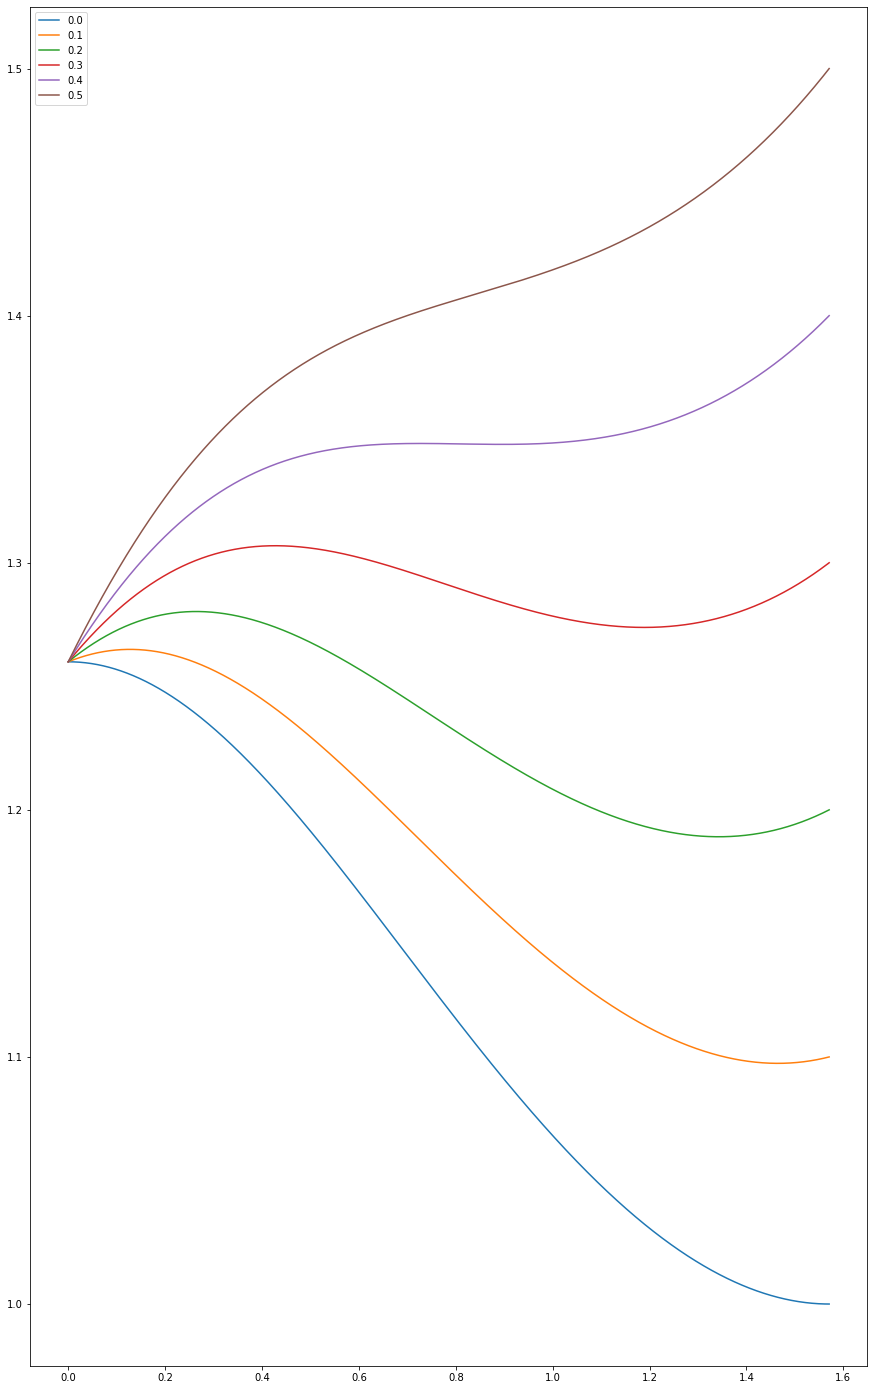

In [8]:
plt.figure(figsize = (15,25))
vals_theta = np.linspace(0,np.pi/2,10000)
for k_val in np.linspace(0,0.5,6):
    e = lambdify(x, energy.subs(k,k_val), "numpy")
    plt.plot(vals_theta,e(vals_theta),label = k_val.round(2))
plt.legend()

#### **Question 5 :**
> Starting with $\theta = \pi/4$, find the angle giving the local energy minimum for each k in values_k. Plot the equilibrium angle $\theta_{min}$, and the value of the derivatives of the energy $\left. \dfrac{\partial \mathcal{E}}{\partial \theta}\right\rvert_{\theta_{min}}$, $\left. \dfrac{\partial^2 \mathcal{E}}{\partial \theta^2}\right\rvert_{\theta_{min}}$, $\left (\left. \dfrac{\partial^2 \mathcal{E}}{\partial \theta^2}\right\rvert_{\theta_{min}}\right)^2$ at this angle for each k. 

**Correction** : 

100%|██████████| 10001/10001 [00:08<00:00, 1246.59it/s]


Text(0, 0.5, 'square of second derivative value at minimum')

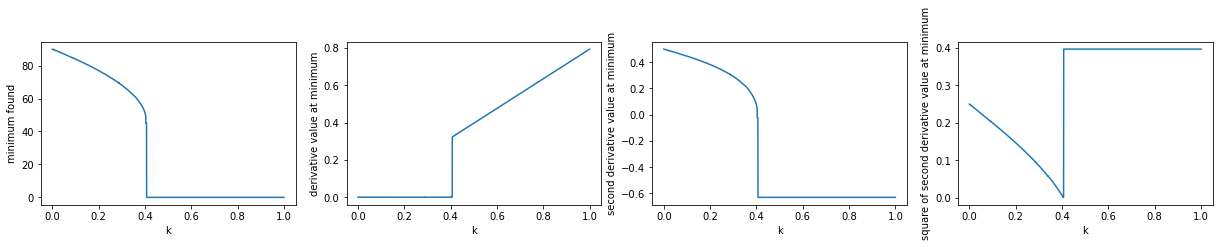

In [68]:
e = lambdify((x,k), energy, "numpy")
d = lambdify((x,k), first_derivative, "numpy")
s = lambdify((x,k), second_derivative, "numpy")
npoints = 10001
B = []
Derivatives = []
Second_Derivatives =[]
Solutions = []
values_k = np.linspace(0, 1, npoints)
eps = 1e-3

for j,k_val in enumerate(tqdm(values_k)) : 
    #print(j)
    
    f = lambda x : e(x,k_val)
    g = lambda x : d(x,k_val)
    h = lambda x : s(x,k_val)
    sols = minimize(fun = f,x0=(np.pi/4),method = "SLSQP",bounds=[(0,np.pi/2)])
    
    assert (sols.success)
    
    min_theta = sols['x']
    if g(min_theta)<eps : 
        B.append(k_val)
    Derivatives.append(g(min_theta))
    Second_Derivatives.append(h(min_theta))
    Solutions.append(min_theta)
    
Derivatives=np.array(Derivatives)
Second_Derivatives=np.array(Second_Derivatives)
Solutions=np.array(Solutions)
    
fig,ax = plt.subplots(1,4,figsize = (21,3))
ax[0].plot(values_k, Solutions*180/np.pi)
ax[0].set_xlabel("k")
ax[0].set_ylabel("minimum found")
ax[1].plot(values_k, Derivatives)
ax[1].set_xlabel("k")
ax[1].set_ylabel("derivative value at minimum")
ax[2].plot(values_k, Second_Derivatives)
ax[2].set_xlabel("k")
ax[2].set_ylabel("second derivative value at minimum")
ax[3].plot(values_k, Second_Derivatives**2)
ax[3].set_xlabel("k")
ax[3].set_ylabel("square of second derivative value at minimum")

#### **Question 6 :**
> Estimate the value $k_c$ where this local minimum disappears, and its associated angle $\theta_c$. Compute the values of the first two derivatives $\left. \dfrac{\partial \mathcal{E}}{\partial \theta}\right\rvert_{\theta_c} $ and  $\left. \dfrac{\partial^2 \mathcal{E}}{\partial \theta^2}\right\rvert_{\theta_c} $.

**Correction**

In [61]:
k_crit=values_k[np.argmin(Second_Derivatives**2)]
g =  lambda x : d(x,k_crit)
h =  lambda x : s(x,k_crit)
theta_c = fsolve(g,np.pi/4)

print("Critical point :",(k_crit,theta_c[0]*180/np.pi))
print("First derivative :",g(theta_c),"Second derivative :", h(theta_c))

Critical point : (0.4033, 43.47264310305924)
First derivative : [5.55111512e-17] Second derivative : [-0.04922366]


In this rescaled energy, the disappearance of the local minimum $\theta > 0$ when k is increased above some threshold defines a critical point $(\kappa_c, \theta_c)$. This critical point, where the final cell jumps from an incomplete constriction to a full division, is given by : 

$0 = \left. \dfrac{\partial \mathcal{E}}{\partial \theta}\right\rvert_{\theta_c} $ and  $0 = \left. \dfrac{\partial^2 \mathcal{E}}{\partial \theta^2}\right\rvert_{\theta_c} $ 

This is a first order phase transition.

#### **Question 7 :**
> Plot the equilibrium angles and draw the shape of the cells for $\kappa \in \{0,0.2,0.4,0.6\}$

**Correction**

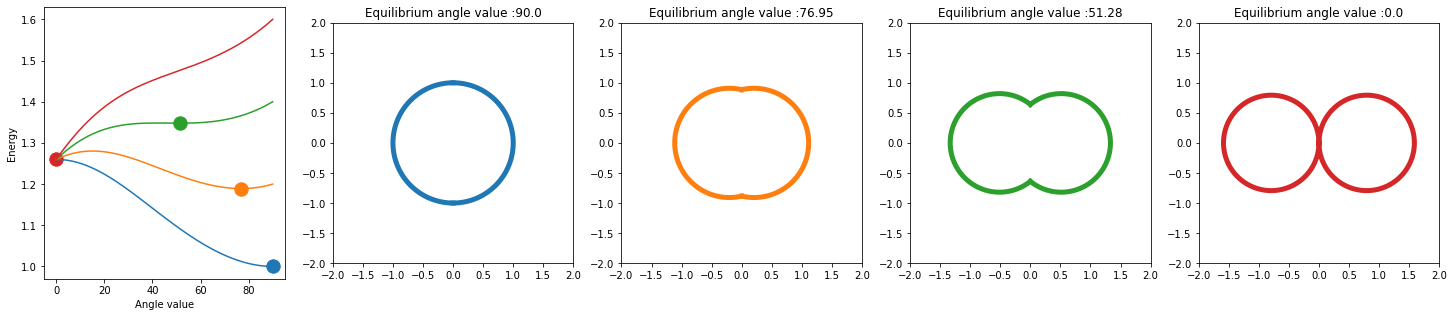

In [69]:
fig,ax = plt.subplots(1,5,figsize =(25,5))
colors = ['tab:blue','tab:orange','tab:green','tab:red']
R0 = 1
for j,idx_val in enumerate([0,2000,4000,6000]) : 
    
    theta_sol = Solutions[idx_val]
    k_value = values_k[idx_val]
    R = R0/((F.subs(x,theta_sol[0]))**(1/3))
    e = lambdify((x), energy.subs(k,k_value), "numpy")
    
    theta_values_k = np.linspace(theta_sol, 2*np.pi-theta_sol,100)
    circle_x = R*np.cos(theta_values_k)
    circle_y = R*np.sin(theta_values_k)

    ax[0].plot(vals_theta*180/np.pi,e(vals_theta))
    ax[0].scatter(theta_sol*180/np.pi,e(theta_sol),s = 180)
    ax[0].set_ylabel("Energy")
    ax[0].set_xlabel("Angle value")
    ax[0].set_xlim(-5,95)

    
    ax[j+1].plot(circle_x-R*np.cos(theta_sol),circle_y,color=colors[j],linewidth=5)
    ax[j+1].plot(R*np.cos(theta_sol)-circle_x,circle_y,color=colors[j],linewidth=5)
    ax[j+1].set_title("Equilibrium angle value :" + str((theta_sol[0]*180/np.pi).round(2)))
    ax[j+1].set_xlim(-2,2)
    ax[j+1].set_ylim(-2,2)
    ax[j+1].set_aspect('equal')#, adjustable='box')

## III - Dynamics

We now want to study the furrow constriction dynamics, i.e the temporal evolution of $\dfrac{r_f}{R_0}$. We will establish these dynamics by expressing the derivative of this quantity with respect to $\theta$. As before, we will use the symbolic computation library sympy to evaluate numerical quantities.

To establish the dynamic equation, we note that the power of active effects is exactly dissipated by viscous cell deformations. The viscous dissipation is made of two contributions, the stretching of the poles and the constriction of the ring, which we estimate in scaling. The volume of acto-myosin in the poles is $V_p = 2A_p e_p$ and in the ring $V_f = 2\pi r_f w e_f$, where $w$ and $e_f$ are the width and thickness of the contractile ring. (We remind that the surface of each cell pole writes : $A_p = 2\pi R^2 (1+\text{cos}(\theta))$). The value $e_p \approx e_0$ and the ring thickness $e_f$ reach a steady-state value that depends on turnover. This yields the viscous dissipated power : 



$\begin{align}
P_d &= \dfrac{1}{2} \eta \left[ V_p \left(\dfrac{1}{R} \dfrac{dr_f}{dt} \right)^2 + V_f \left( \dfrac{1}{r_f} \dfrac{dr_f}{dt}\right)^2  \right] \newline
P_d &= \dfrac{1}{2} \eta \left[ e_f 4 \pi R^2 (1+\text{cos}\theta) \dfrac{1}{R^2}  \left(\dfrac{dr_f}{dt} \right)^2 + 2\pi w e_f r_f \dfrac{1}{r_f^2} \left(  \dfrac{dr_f}{dt}\right)^2  \right]  \newline
&\approx \dfrac{1}{2} \eta \left[ 4 e_0 \pi(1+\text{cos}\theta)  \left(\dfrac{dr_f}{dt} \right)^2 + 2\pi w e_f\dfrac{1}{r_f} \left( \dfrac{dr_f}{dt}\right)^2  \right]  \newline
&= \left(\dfrac{dr_f}{dt} \right)^2 \dfrac{1}{2} \eta \left[ 4 \pi e_0 (1+\text{cos}\theta)   + \dfrac{4\pi}{2} w e_f\dfrac{F(\theta)^{1/3}}{R_0 \sin \theta}  \right]  \newline
&= \left(\dfrac{dr_f}{dt} \right)^2 4 \pi e_0 \eta \left[ (1+\text{cos}\theta)   + \dfrac{1}{2 R_0} w \dfrac{e_f}{e_0} \dfrac{F(\theta)^{1/3}}{\sin \theta}  \right]  \newline
&= \left(\dfrac{dr_f}{dt} \right)^2 4 \pi e_0 \eta \left[ (1+\text{cos}\theta)   + \lambda \dfrac{F(\theta)^{1/3}}{\sin \theta}  \right]  \newline
\end{align}
$

The balance of mechanical and dissipated powers yields : 

$\dfrac{d \mathcal{E}}{dt} + P_d = 0$

Besides :

$
\dfrac{1}{\mathcal{E}_0} \dfrac{d\mathcal{E}}{dt} = \dfrac{\partial \mathcal{E}/\mathcal{E}_0}{\partial \theta} \dfrac{\partial \theta}{\partial r_f} \dfrac{d r_f}{d_t} = \dfrac{\partial \mathcal{E}/\mathcal{E}_0}{\partial \theta} \left(\dfrac{\partial r_f}{\partial \theta}\right)^{-1} \dfrac{d r_f}{d_t} 
$

And, with $T_a=\frac{\eta e_0}{N^a_0}$ : 

$\dfrac{1}{\mathcal{E}_0} P_d = \left(\dfrac{dr_f}{dt} \right)^2 \dfrac{4\pi e_0 \eta}{4 \pi R_0^2 N^a_0} \left[ (1+\text{cos}\theta)   + \dfrac{\lambda}{2} \dfrac{F(\theta)^{1/3}}{\sin \theta}  \right] = \left(\dfrac{dr_f}{dt} \right)^2 \dfrac{T_a}{ R_0^2} \left[ (1+\text{cos}\theta)   + \dfrac{\lambda}{2} \dfrac{F(\theta)^{1/3}}{\sin \theta}  \right] $

We have thus : 

$
\begin{align}
\dfrac{\partial \mathcal{E}/\mathcal{E}_0}{\partial \theta} \left(\dfrac{\partial r_f}{\partial \theta}\right)^{-1} \dfrac{d r_f}{d_t}  &= - \left(\dfrac{dr_f}{dt} \right)^2 \dfrac{T_a}{ R_0^2} \left[ (1+\text{cos}\theta)   + \dfrac{\lambda}{2} \dfrac{F(\theta)^{1/3}}{\sin \theta}  \right] 
\newline
\dfrac{\partial \mathcal{E}/\mathcal{E}_0}{\partial \theta} \left(\dfrac{\partial r_f/R_0}{\partial \theta}\right)^{-1} &= - \dfrac{dr_f}{dt} \dfrac{T_a}{ R_0} \left[ (1+\text{cos}\theta)   + \dfrac{\lambda}{2} \dfrac{F(\theta)^{1/3}}{\sin \theta}  \right] \newline 
\dfrac{dr_f}{dt} \dfrac{T_a}{ R_0} &= - \dfrac{\partial \mathcal{E}/\mathcal{E}_0}{\partial \theta} \left(\dfrac{\partial r_f/R_0}{\partial \theta}\right)^{-1} \left[ (1+\text{cos}\theta)   + \dfrac{\lambda}{2} \dfrac{F(\theta)^{1/3}}{\sin \theta}  \right]^{-1} = -\mathcal{H}(\theta,\kappa,\lambda)
\end{align}
$

We will compute numerical the values of this function $\mathcal{H}$ to obtain the evolution of the furrow radius $r_f$

#### **Question 8 :**
> From the last equation, express the angle temporal variation $\dot \theta$. 

**Correction** : 

We have $\dfrac{r_f}{R_0} = \sin(\theta) F(\theta)^{-1/3}$, thus $\dfrac{d r_f/R_0}{dt} = \dot \theta \left(\dfrac{\partial r_f/R_0}{\partial \theta}\right) = \dot \theta \dfrac{\partial \left(\sin (\theta) F(\theta)^{-1/3}\right)}{\partial \theta} = \dot \theta \left(\sin (\theta) F(\theta)^{-1/3}\right)'$

Eventually : 

$T_a \dot \theta 
=- \mathcal{H}(\theta, \kappa, \lambda)\left(\dfrac{\partial r_f/R_0}{\partial \theta}\right)^{-1} 
= - \dfrac{\partial \mathcal{E}/\mathcal{E}_0}{\partial \theta} \left(\dfrac{\partial r_f/R_0}{\partial \theta}\right)^{-2} \left[ (1+\text{cos}\theta)   + \dfrac{\lambda}{2} \dfrac{F(\theta)^{1/3}}{\sin \theta}  \right]^{-1} $

#### **Question 9 :**
> Compute numerically $\dot \theta$ with sympy, and integrate the evolution of $\theta$, $r_f$ in time with a forward-euler-scheme for $t \in [0,15]$, starting with $\theta(0)=\pi/2$, with $\lambda = 1$ and $\kappa \in \{0.1,0.25,0.4,0.5,0.75,1\}$. Check that it is compatible with the previous results obtained from the static analysis.

**Correction** : 

At each timestep, we have : 

$
\begin{align}
\theta(t+dt) &= \theta(t) + \dot \theta (t) dt \newline
r_f(t+dt) &= sin(\theta(t+dt)) F(\theta(t+dt))^{-1/3} R_0
\end{align}
$

In [65]:
x, k, l = symbols("x k l")
F = 1 +1.5*cos(x) - 0.5*(cos(x))**3
energy = k * sin(x)/(F**(1/3)) + (1+ cos(x))/(F**(2/3))

r_f = sin(x)*(F**(-1/3))

dr_f = diff(r_f,x)
first_derivative = diff(energy,x)

H = ((1+cos(x)) + l*(F**(1/3))/sin(x))**(-1)*first_derivative/dr_f

dtheta = - H/dr_f
dtheta = dtheta.subs(l,0.1)

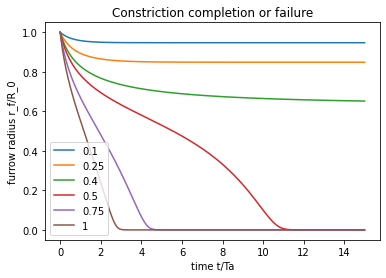

In [66]:
theta0 = np.pi/2
R0 = 1

for k_value in [0.1,0.25,0.4,0.5,0.75,1]:

    expr_dtheta = dtheta.subs(k,k_value)
    func_dtheta = lambdify(x,expr_dtheta,"numpy")
    func_rf = lambdify(x,r_f,"numpy")

    npoints = 1000
    timepoints = np.linspace(0,15,npoints)
    Thetas = np.zeros(npoints)
    Rf = np.zeros(npoints)
    dt = timepoints[1]-timepoints[0]


    for j,t in enumerate(timepoints) :

        if j == 0 : 
            Thetas[0] = theta0
            Rf[0]  = func_rf(Thetas[0])*R0
            continue

        Thetas[j] = Thetas[j-1] + dt*func_dtheta(Thetas[j-1])
        Rf[j]  = func_rf(Thetas[j])*R0

    plt.plot(timepoints,Rf,label = k_value)
    
plt.title("Constriction completion or failure")
plt.xlabel("time t/Ta")
plt.ylabel("furrow radius r_f/R_0")
plt.legend()

#### **Question 10 :**
> Determine the cytokinesis duration with $R_0 \in \{0.5,1,2,4\}$. Show that in case of cytokinesis completion $\lambda = 1, \kappa = 0.75$, the initial cell radius R0 has no impact on the cytokinesis time.

**Correction** : 

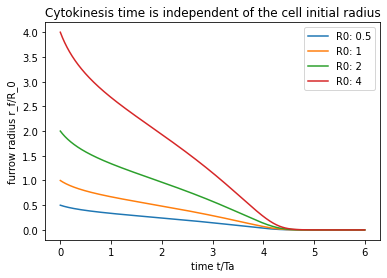

In [67]:
theta0 = np.pi/2
k_value = 0.75

for R0 in [0.5,1,2,4]:

    expr_dtheta = dtheta.subs(k,k_value)
    func_dtheta = lambdify(x,expr_dtheta,"numpy")
    func_rf = lambdify(x,r_f,"numpy")

    npoints = 1000
    timepoints = np.linspace(0,6,npoints)
    Thetas = np.zeros(npoints)
    Rf = np.zeros(npoints)
    dt = timepoints[1]-timepoints[0]


    for j,t in enumerate(timepoints) :

        if j == 0 : 
            Thetas[0] = theta0
            Rf[0]  = func_rf(Thetas[0])*R0
            continue

        Thetas[j] = Thetas[j-1] + dt*func_dtheta(Thetas[j-1])
        Rf[j]  = func_rf(Thetas[j])*R0

    plt.plot(timepoints,Rf,label ="R0: " +str(R0))
    
plt.title("Cytokinesis time is independent of the cell initial radius")
plt.xlabel("time t/Ta")
plt.ylabel("furrow radius r_f/R_0")
plt.legend()

## Conclusion

Using both numerical and scaling analyses, the authors rationalized the physical mechanisms governing ring constriction in the cytokinesis of animal cells. A gradient of surface contractility from the poles to the equator is sufficient to drive cytokinesis and to reproduce its main features: formation of the contractile ring, cortical flow toward the equator, and furrow constriction. 
This model provides quantitative criteria for cytokinesis completion and propose a general framework for interpreting and characterizing constriction failure. The authors furthermore demonstrate the physical mechanism leading to the independence of cytokinesis duration on the initial cell size in embryos.

The thin shell model described in the paper studied can be generalized in 3D. The numerical integration of the equations describing cortex dynamics is done via finite-element methods.
The results gives a biology accurate (and beautiful !) view of the cortex actin flows and of the cytokinesis dynamics. For more information, see : 
> H. Borja Da Rocha et al., *A viscous active shell theory of the cell cortex*, 2021
https://arxiv.org/abs/2110.12089

<img src="Images/Thin_shell_model_of_cytokinesis.png" alt="drawing" width="800"/>